# Collaborators:

- Niels Savvides
- Ilkay Yuksel

### Define Imports

This section contains all the imports that are needed to run the program.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Define Global Functions

This section contains all functions that come in handy during this assignment.

In [2]:
def get_image(path):
    image = cv2.imread(path)
    return image

In [3]:
def print_image(path: str, title) -> None:
    image = cv2.imread(path)
    cv2.imshow(title, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
def print_image(image, title) -> None:
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [5]:
def print_image_RGB(image, title) -> None:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

#### Question 1

**What do the dimensions of the image array represent?**

> An image's dimensions are determined by its **height** and **width**, denoting its **size**. The **depth** parameter, commonly set to three, signifies the **number of color channels** utilized in the RGB color model: Red, Green, and Blue. This depth elucidates that every pixel within the image is characterized by a blend of these fundamental colors.

#### Assignment I: 

**Crop the image so it becomes square by chopping off the bottom part**

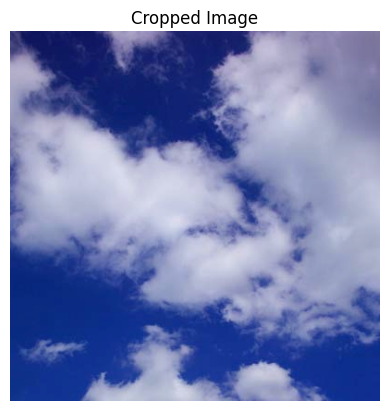

In [6]:
image = get_image('./source_images/clouds.png')

height, width, depth = image.shape

cropped_image = image[:image.shape[1], :image.shape[1]]

print_image_RGB(cropped_image, 'Cropped Image')

#### Assignment II:

**Discolor the image by reducing the intensity of the red value of every pixel by half**

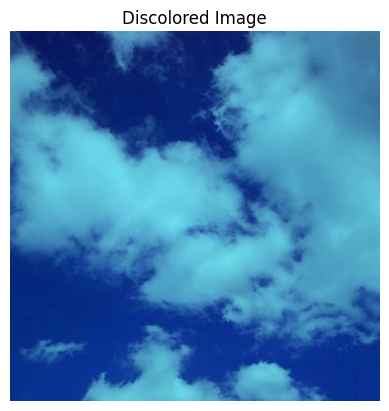

In [7]:
image = cropped_image.copy()

image[:, :, 2] = image[:, :, 2] *0.5

print_image_RGB(image, 'Discolored Image')

#### Assignment III:

**Discolor the image by doubling the intensity of the red value of every pixel. You may have to handle an overflow problem (and use two more lines of code)**

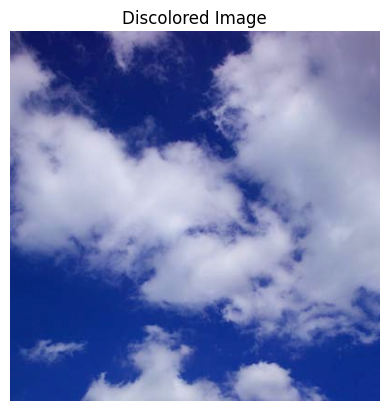

In [8]:
red_channel = image[:, :, 2] * 2

image[:, :, 2] = np.clip(red_channel, 0, 255) # Used to prevent overflow

print_image_RGB(image, 'Discolored Image')



#### Assignment IV:

**Make a regular grid of black dots on the image so that the dots are 10 pixels apart vertically and horizontally.**

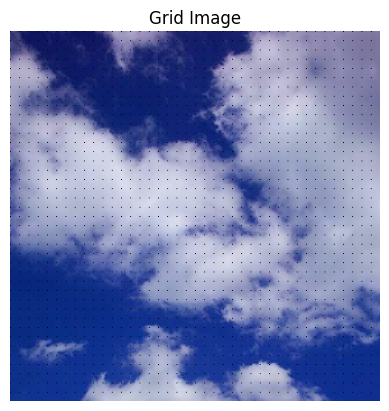

In [9]:
image[::10, ::10] = 0
        
print_image_RGB(image, 'Grid Image')

## Thresholding

Thresholding is a method to segment grayscale images. It can be used to find objects of interest in images. Pixel intensity values are compared to threshold value and classified according to whether they are higher or lower than this value. Finding the correct threshold is often not trivial.

### Exercise II:

Reset the previous image object for **exercise II**

In [10]:
image = get_image('./source_images/clouds.png')

#### Assignment V:

**Convert the image to grayscale image**

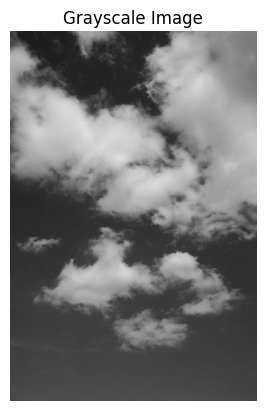

In [11]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print_image_RGB(gray_image, 'Grayscale Image')

#### Assignment VI

**Threshold the grayscale image at 50% of the maximum value for this datatype.**

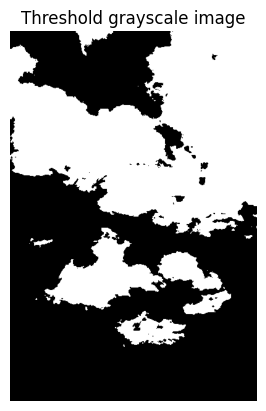

In [12]:
_, threshold_image = cv2.threshold(gray_image, 0.5 * np.max(gray_image), 255, cv2.THRESH_BINARY)

print_image_RGB(threshold_image, 'Threshold grayscale image')

#### Assignment VII

**Threshold the grayscale image at the ideal threshold determined by Otsu's method**

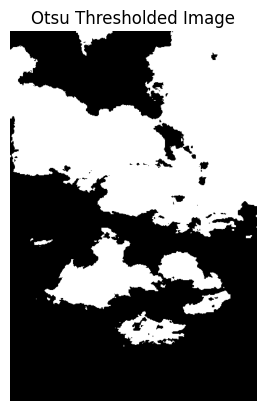

In [13]:
otsu_threshold, thresholded_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print_image_RGB(thresholded_image, 'Otsu Thresholded Image')

### Exercise III

#### Assignment VIII

**Adaptively threshold the grayscale version of painting2.jpg so you get a similar result
to the one below, where the background is uniformly white and you can cut out the painting along black lines.**

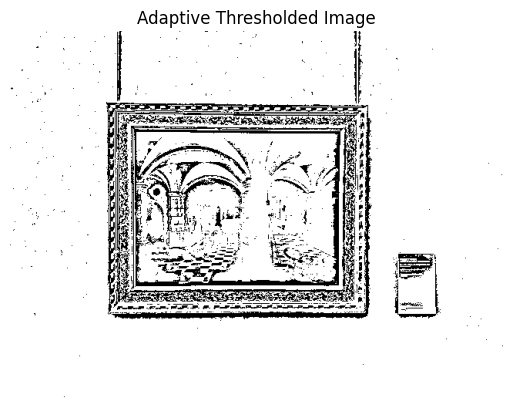

In [14]:
image = get_image('./source_images/painting2.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thresholded_image = cv2.adaptiveThreshold(
    gray_image,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    25, 
    9
)

print_image_RGB(thresholded_image, 'Adaptive Thresholded Image')

## Thresholding

### Exercise IV

#### Assignment IX

**Remove the white noise from whitenoise.png by Gaussian filtering. Find parameters for 
the Gaussian kernel that you find strike a good balance between noise level and blurriness of the result. This is subjective, but experiment with it!**

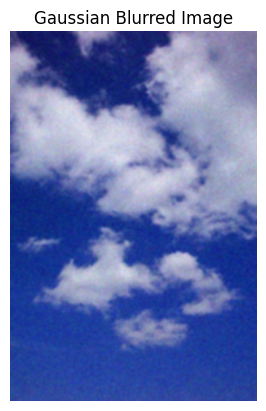

In [15]:
image = get_image('./source_images/whitenoise.png')
blurred_image = cv2.GaussianBlur(image, (5, 5), 3)

print_image_RGB(blurred_image, 'Gaussian Blurred Image')

#### Question II

**Can you choose the kernel size and sigma of the distribution independent of each other?**

> Yes, you can choose the kernel size and sigma independently of each other. The kernel size is the size of the filter that goes over the image and needs to be an odd number, so the kernel has a center. 
> The sigma value is the standard deviation of the Gaussian distribution, this determines the amount of blur. When you specify sigma as zero, it will be calculated from the kernel size. You can give a value different from zero, this will then be a value independent of the kernel size. When both of the kernel size and sigma are small, the filter may not have much effect and when they are both large, the filter may blur too much.
> It's not wise to set them independently as the kernel and sigma of the Gaussian function are correlated with each other. Best practice is choosing one of the two to fine-tune and let the other one be calculated based on that.

#### Assignment X

**Test the gaussian filter on saltandpeppernoise.png**

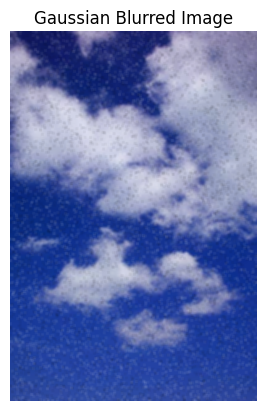

In [16]:
image = get_image('./source_images/saltandpeppernoise.png')

blurred_image = cv2.GaussianBlur(image, (5, 5), 3)

print_image_RGB(blurred_image, 'Gaussian Blurred Image')

#### Assignment XI

**Apply median filtering on the same image**

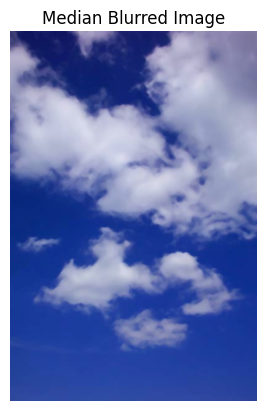

In [17]:
image = get_image('./source_images/saltandpeppernoise.png')

# Apply Median Blur
median_blurred_image = cv2.medianBlur(image, 5)

print_image_RGB(median_blurred_image, 'Median Blurred Image')

### Question III

**Which result is preferable and why?**

> The image with the median blur looks the best, here we don't see the noise anymore. With the Gaussian blur we still see the noise, it's just more blurry. The median blur here is more successful in getting rid of the noise. Obviously, the median filter is a good choice for image processing because it indeed works better with outliers and the image does not become blurry. It can be used to remove noise

### Exercise VI

#### Assignment XII

**Implement unsharp masking to sharpen unsharp.png. Make sure you do not get overflow
in your datatype! Your goal is to achieve something similar to the image below.
Useful functions: addWeighted**

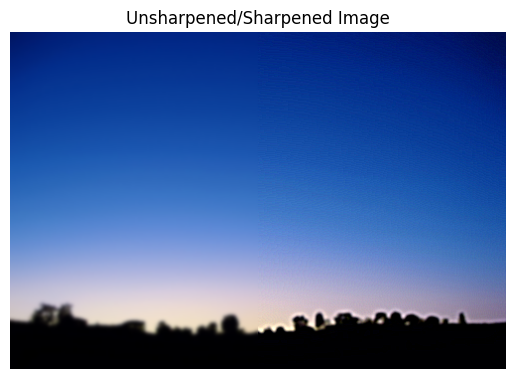

In [18]:
image = cv2.imread('./source_images/unsharp.png')

image_float = np.float32(image)

blurred_image = cv2.GaussianBlur(image_float, (5, 5), 0)

difference_image = cv2.subtract(image_float, blurred_image)

sharpened_image = cv2.addWeighted(image_float, 1, difference_image, 10, 0)

sharpened_image_uint8 = np.clip(sharpened_image, 0, 255).astype('uint8')

height, width, channels = image.shape
midpoint = width // 2

combined_image = np.zeros_like(image)

combined_image[:, :midpoint] = image[:, :midpoint]
combined_image[:, midpoint:] = sharpened_image_uint8[:, midpoint:]

print_image_RGB(combined_image, 'Unsharpened/Sharpened Image')


### Exercise VII

#### Assignment XIII
**Write a program that blurs blots.png diagonally with the kernel below (mind the multi-
plication factor in front).**


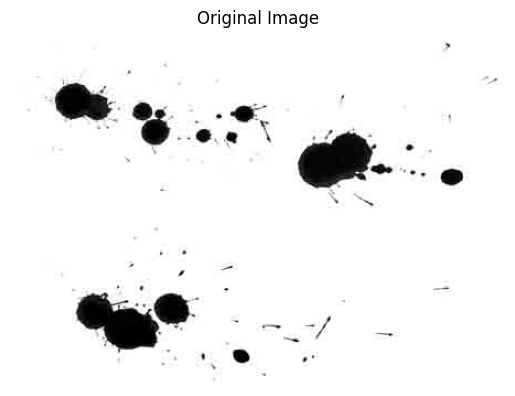

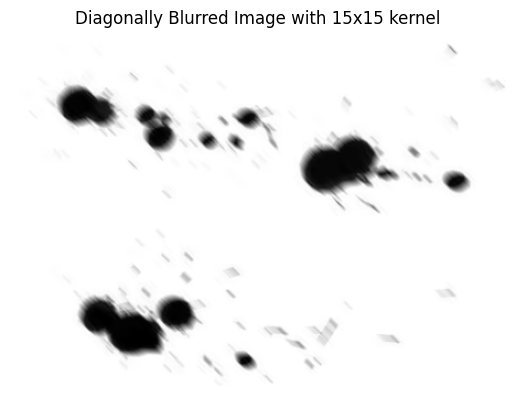

In [19]:
image = cv2.imread('./source_images/blots.png')
other_image = cv2.imread('./source_images/blots.png')

kernel = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=float)

kernel_scaled = kernel * (1/7)

diagonally_blurred_image_15x15 = cv2.filter2D(image, -1, kernel_scaled)

print_image_RGB(image, 'Original Image')
print_image_RGB(diagonally_blurred_image_15x15, 'Diagonally Blurred Image with 15x15 kernel')

### Question IV

**You can achieve the same result with a 8x8 kernel, by moving the anchor point. What coordi-nates will you specify for the anchor point?**

Specifying the anchor point as **(7, 7)** accurately aligns with this requirement, ensuring the smaller kernel replicates the effect of a larger one effectively.

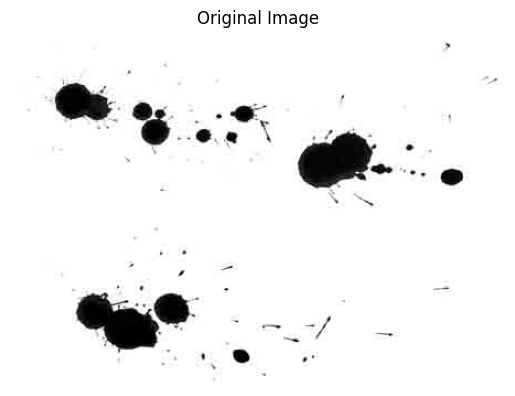

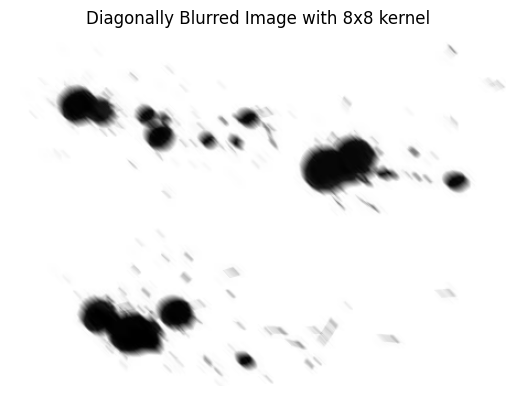

In [20]:
image = cv2.imread('./source_images/blots.png')

kernel_8_8 =  kernel_scaled[:8, :8]
anchor = (7,7) # Define anchor point

diagonally_blurred_image_8x8 = cv2.filter2D(image, -1, kernel_8_8, anchor=anchor)

print_image_RGB(image, 'Original Image')
print_image_RGB(diagonally_blurred_image_8x8, 'Diagonally Blurred Image with 8x8 kernel')

**EXTRA**: check if both diagonally blurred images are the same.

In [21]:
# Check if the shapes of the images are the same
if diagonally_blurred_image_8x8.shape == diagonally_blurred_image_15x15.shape:
    # Check if the images are exactly the same
    difference = cv2.subtract(diagonally_blurred_image_8x8, diagonally_blurred_image_15x15)
    b, g, r = cv2.split(difference)

    if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
        print("The images are the same")
    else:
        print("The images are different")
else:
    print("The images have different sizes or channels and cannot be compared")

The images are the same
